In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
def WaitingTime(process,n,bt,wt,timeslice):
    rem_bt = [0] * n
    wait_time = []
    
    for j in range(1,len(timeslice)+1):
        for i in range(n):
            rem_bt[i] = bt[i]
        wt = [0] * n
        t=0
        while(1):
            done = True    
            for i in range(n):
                if(rem_bt[i] > 0):
                    done = False
                    if(rem_bt[i] > j):
                        t+=j
                        rem_bt[i] -= j
                    else:
                        t = t + rem_bt[i]
                        wt[i] = t - bt[i]
                        rem_bt[i] = 0
            if(done == True):
                break
        wait_time.append(wt)
    return wait_time

def AvgWaitingTime(process,n,bt,timeslice):
    print(timeslice)
    wt = [0] * n
    total_wt = []
    wait_time = WaitingTime(process,n,bt,wt,timeslice)
    for i in range(len(wait_time)):
        sum=0
        for j in wait_time[i]:
            sum += j 
        total_wt.append(sum)
    arr = np.array(total_wt)
    return(arr/n)
        
if __name__ =="__main__":
    n = int(input("Enter no of process"))
    process = []
    bt = []
    timeslice = []
    avg=[]
    print("Enter the process")
    for i in range(n):
        i = int(input())
        process.append(i)
    print("Enter the burst")
    for i in range(n):
        i = int(input())
        bt.append(i)
    time = int(input("Enter time slice int range value"))
    for i in range(1,time+1):
        timeslice.append(i)
    avg = AvgWaitingTime(process,n,bt,timeslice) 
    print(avg)
    np.array(timeslice)

Enter no of process3
Enter the process
1
2
3
Enter the burst
20
10
5
Enter time slice int range value20
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[13.33333333 14.         14.66666667 16.         13.33333333 14.66666667
 16.         17.33333333 18.66666667 15.         15.66666667 16.33333333
 17.         17.66666667 18.33333333 19.         19.66666667 20.33333333
 21.         16.66666667]


Text(0, 0.5, 'time slice values')

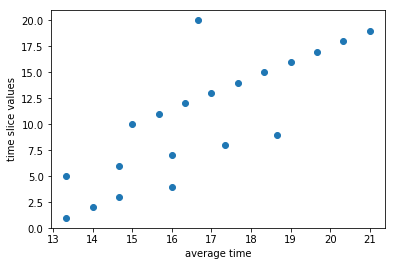

In [19]:
plt.scatter(avg,timeslice)
plt.xlabel("average time")
plt.ylabel("time slice values")

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


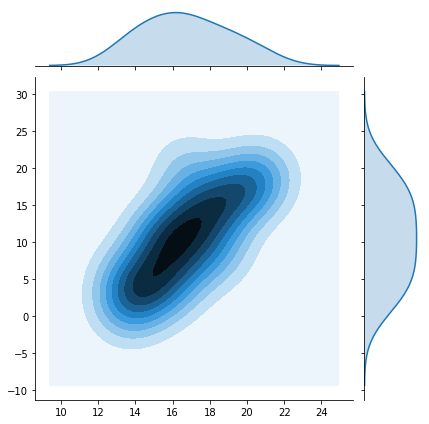

In [20]:
sns.jointplot(avg,timeslice,kind="kde")